### 1. Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz
import random
random.seed(5)

In [2]:
cols = ['alcohol_by_weight', 'rating', 'bitterness', 'nitrogen', 
        'turbidity', 'sugars', 'degree_of_fermentation', 
        'calorific_value', 'density', 'pH', 'colour', 'sulphites']

cols_new = ['alcohol_by_weight', 'bitterness', 'nitrogen', 
            'turbidity', 'sugars', 'degree_of_fermentation', 
            'calorific_value', 'density', 'pH', 'colour', 'sulphites', 'rating']

df = pd.read_table("beer_ratings.txt", names = cols)

df = df[cols_new]

scaler = StandardScaler() 
df = pd.DataFrame(scaler.fit_transform(df), columns = cols_new)

X = df.iloc[:, :-1] # Independent Variables

y = df.iloc[:, -1] # Dependent Variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [3]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
r2 = cross_val_score(model, X_train, y_train, cv = 10)
np.mean(r2)

0.36601545941466734

In [4]:
lr.score(X_train, y_train)

0.42036806271004346

In [5]:
lr.score(X_test, y_test)

0.4087336577126648

In [6]:
coeffs = model.coef_
coeffs

array([ 0.30794059,  0.19079657, -0.25751295, -0.02908371,  0.07104206,
       -0.09918681,  0.00768877, -0.14574767, -0.00615089,  0.22682403,
       -0.06310066])

In [7]:
feature_names = df.drop('rating', axis = 1).columns
feature_names

Index(['alcohol_by_weight', 'bitterness', 'nitrogen', 'turbidity', 'sugars',
       'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour',
       'sulphites'],
      dtype='object')

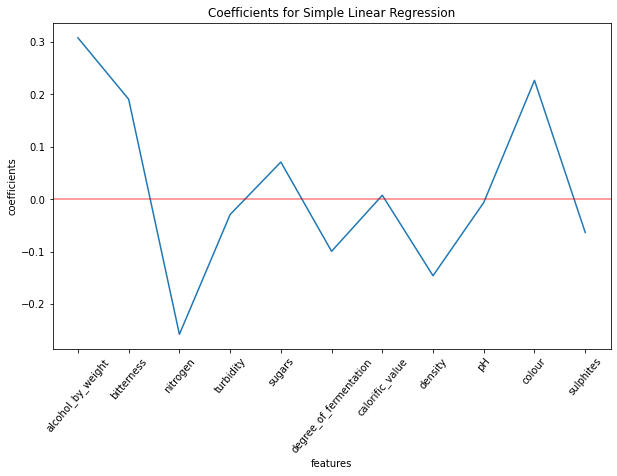

In [8]:
# Using matplotlib commands to plot
plt.figure(figsize = (10, 6))
plt.plot(range(len(coeffs)), coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid', alpha = 0.5)
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Simple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [9]:
X_train.corr().style.background_gradient(cmap = 'coolwarm')

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites
alcohol_by_weight,1.000000,-0.022136,-0.206977,0.175810,0.070588,-0.224888,-0.139401,-0.430133,0.173708,0.177135,-0.167249
bitterness,-0.022136,1.000000,-0.266752,0.695532,0.160965,0.105416,-0.161275,0.690144,-0.685435,0.233046,-0.113176
nitrogen,-0.206977,-0.266752,1.000000,-0.563975,0.038676,0.065941,0.011617,0.027696,0.234377,-0.313309,0.088501
turbidity,0.175810,0.695532,-0.563975,1.000000,0.161480,0.217605,-0.052688,0.378268,-0.546319,0.369405,0.010781
sugars,0.070588,0.160965,0.038676,0.161480,1.000000,0.077425,0.135666,0.369060,-0.128448,0.016385,0.164238
degree_of_fermentation,-0.224888,0.105416,0.065941,0.217605,0.077425,1.000000,0.016158,0.217230,-0.280601,0.349598,0.010635
calorific_value,-0.139401,-0.161275,0.011617,-0.052688,0.135666,0.016158,1.000000,-0.033331,0.023446,-0.012663,0.687289
density,-0.430133,0.690144,0.027696,0.378268,0.369060,0.217230,-0.033331,1.000000,-0.350995,0.154432,0.035746
pH,0.173708,-0.685435,0.234377,-0.546319,-0.128448,-0.280601,0.023446,-0.350995,1.000000,-0.190614,-0.045398
colour,0.177135,0.233046,-0.313309,0.369405,0.016385,0.349598,-0.012663,0.154432,-0.190614,1.000000,-0.011751


This is a decent score we can come back to and try and improve with GridSearchCV

In [10]:
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso= GridSearchCV(Lasso(), alpha_values, scoring = 'r2', cv = 10)
print(lasso.fit(X_train, y_train).best_params_)

{'alpha': 0.01}


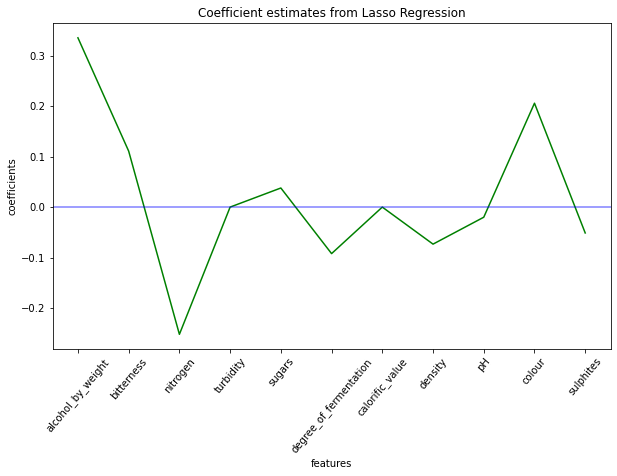

In [11]:
# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha = 0.01)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X_train, y_train).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_lasso_coeffs, color = 'g')
plt.axhline(0, color = 'b', linestyle = 'solid', alpha = 0.5)
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [12]:
best_lasso_model.fit(X_train, y_train).score(X_train, y_train)

0.418401303548681

In [13]:
best_lasso_model.fit(X_train, y_train).score(X_test, y_test)

0.4155737261230982

In [14]:
best_lasso_coeffs

array([ 0.33515329,  0.11083301, -0.25192164,  0.        ,  0.03780094,
       -0.09210249, -0.        , -0.07333668, -0.02005348,  0.20567542,
       -0.05124948])

### 3. Regression Tree

In [15]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test) # R^2

0.28199267784610116

In [16]:
param_dict = {
    "criterion": ["mse", "mae", "r2"],
    "min_samples_split": range(2, 11),
    "max_depth": range(1, 10),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 10)
}

In [17]:
grid = GridSearchCV(dt,
                   param_grid = param_dict,
                   cv = 10,
                   n_jobs = -1)

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'r2'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 11)})

In [19]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [20]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=9, min_samples_split=4)

In [21]:
grid.score(X_train, y_train)

0.44884828266143584

In [22]:
grid.score(X_test, y_test)

0.428420925384442

In [23]:
dt = DecisionTreeRegressor(criterion = 'mse',
                           max_depth = 3,
                           min_samples_leaf = 9,
                           min_samples_split = 4)
dt.fit(X_train, y_train)
print(f'Training Score: {(round(100 * dt.score(X_train, y_train), 2))}%, Test Score: {round(100 * dt.score(X_test, y_test), 2)}%')

Training Score: 44.88%, Test Score: 42.84%


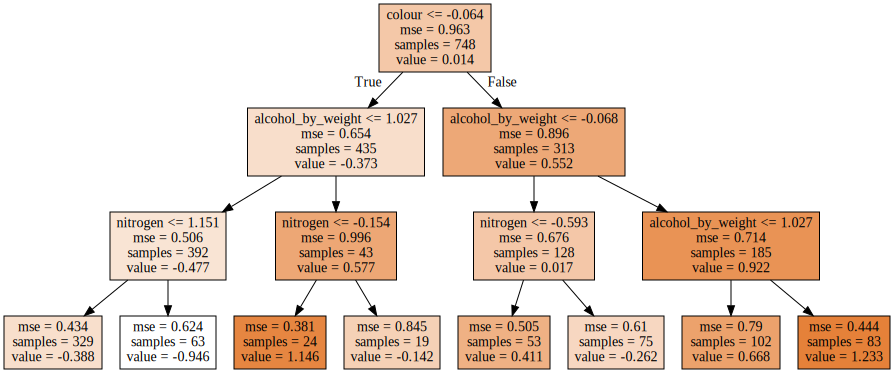

In [24]:
dot_data = tree.export_graphviz(dt, feature_names = list(X), 
                                class_names = sorted(y.unique()), filled = True)
graphviz.Source(dot_data)